In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
# select parameter for Gaussian
filenames = [f for f in glob.glob('/home/dwu/trainData/Noise2Noise/train/ctp/simul/gaussian/*.npy') if 'test' not in os.path.basename(f) and 'rmse' not in os.path.basename(f)]
gaussians = {}
for filename in filenames:
    tokens = os.path.basename(filename).strip('.npy').split('_')
    
    std = float(tokens[2])
    N0 = float(tokens[4])
    
    rmse = np.mean(np.load(filename.replace('.npy', '_rmse.npy'))[0, :])
    
    if N0 not in gaussians:
        gaussians[N0] = []
    
    gaussians[N0].append([std, rmse])
    
for N0 in gaussians:
    vals = np.array(gaussians[N0])
    inds = np.argsort(vals[:, 0])
    gaussians[N0] = vals[inds, :]

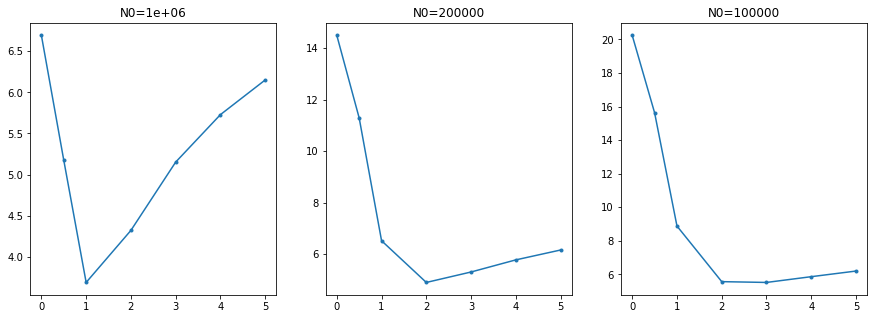

In [3]:
plt.figure(figsize = [15,5])
for i, N0 in enumerate(gaussians):
    plt.subplot(1,3,i+1)
    plt.title('N0=%g'%N0)
    plt.plot(gaussians[N0][:,0], gaussians[N0][:,1], '.-')

In [27]:
# select parameter for TV
filenames = glob.glob('/home/dwu/trainData/Noise2Noise/train/ctp/simul/tv/*.npz')
tvs = {}
for filename in filenames:
    tokens = os.path.basename(filename).strip('.npz').split('_')
    if len(tokens) < 6:
        continue
    
#     rmse = np.mean(np.load(filename)['rmse'])
    rmse = np.load(filename)['rmse'][0]
    
    beta1 = float(tokens[2])
    beta2 = float(tokens[3])
    N0 = float(tokens[5])
    
    if N0 not in tvs:
        tvs[N0] = {}
    if beta2 not in tvs[N0]:
        tvs[N0][beta2] = []
    
    tvs[N0][beta2].append([beta1, rmse])

for N0 in tvs:
    for beta2 in tvs[N0]:
        vals = np.array(tvs[N0][beta2])
        inds = np.argsort(vals[:, 0])
        tvs[N0][beta2] = vals[inds, :]

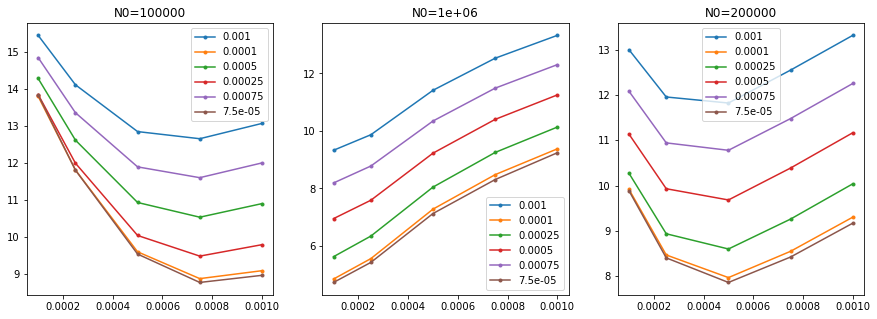

In [28]:
# plot parameters for TV
plt.figure(figsize = [15,5])
for i, N0 in enumerate(tvs):
    plt.subplot(1,3,i+1)
    plt.title('N0=%g'%N0)
    beta2s = []
    for beta2 in tvs[N0]:
        beta2s.append(beta2)
        plt.plot(tvs[N0][beta2][:,0], tvs[N0][beta2][:,1], '.-')
        plt.legend(beta2s)

In [6]:
# select parameter for TIPS
filenames = [f for f in glob.glob('/home/dwu/trainData/Noise2Noise/train/ctp/simul/tips/*.npy') if 'test' not in os.path.basename(f) and 'rmse' not in os.path.basename(f)]
tips = {}
for filename in filenames:
    tokens = os.path.basename(filename).strip('.npz.npy').split('_')
    
    if len(tokens) < 6:
        continue
    
    std1 = float(tokens[2])
    std2 = float(tokens[3])
    N0 = float(tokens[5])
    
    rmse = np.mean(np.load(filename.replace('.npy', '_rmse.npy'))[0, :])
    
    if N0 not in tips:
        tips[N0] = {}
    if std2 not in tips[N0]:
        tips[N0][std2] = []
    
    tips[N0][std2].append([std1, rmse])
    
for N0 in tips:
    for std2 in tips[N0]:
        vals = np.array(tips[N0][std2])
        inds = np.argsort(vals[:, 0])
        tips[N0][std2] = vals[inds, :]

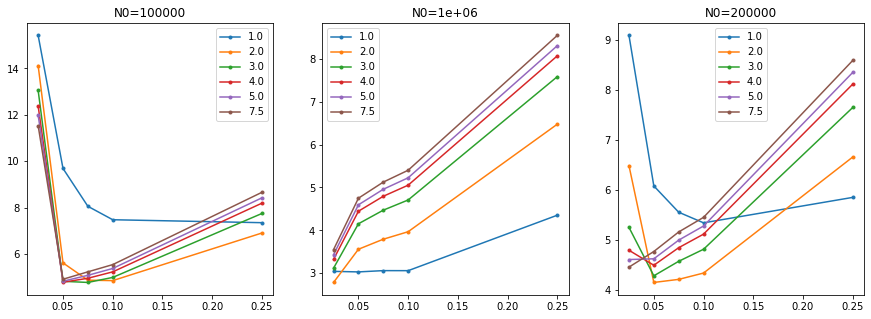

In [7]:
# plot parameters for TIPS
plt.figure(figsize = [15,5])
for i, N0 in enumerate(tips):
    plt.subplot(1,3,i+1)
    plt.title('N0=%g'%N0)
    std2s = []
    for std2 in tips[N0]:
        std2s.append(std2)
        plt.plot(tips[N0][std2][:,0], tips[N0][std2][:,1], '.-')
        plt.legend(std2s)

In [23]:
# select beta for Noise2Noise
filenames = glob.glob('/home/dwu/trainData/Noise2Noise/train/ctp/simul/beta_*_N0_*/tmp/rmse_cbf.npy')
n2ns = {}
for filename in filenames:
    tokens = filename.split('/')[-3].split('_')
    
    beta = float(tokens[1])
    N0 = float(tokens[3])
    
    rmse = np.mean(np.load(filename))
    
    if N0 not in n2ns:
        n2ns[N0] = []
    
    n2ns[N0].append([beta, rmse])
        
for N0 in n2ns:
    vals = np.array(n2ns[N0])
    inds = np.argsort(vals[:, 0])
    n2ns[N0] = vals[inds, :]

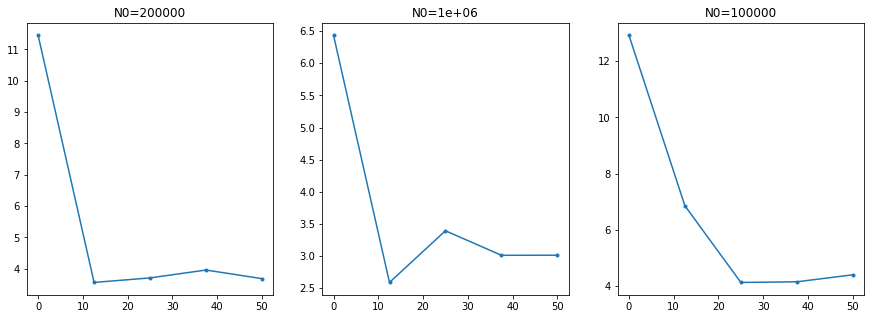

In [24]:
# plot parameters for Noise2Noise
plt.figure(figsize = [15,5])
for i, N0 in enumerate(n2ns):
    plt.subplot(1,3,i+1)
    plt.title('N0=%g'%N0)
    plt.plot(n2ns[N0][:,0], n2ns[N0][:,1], '.-')

In [25]:
# select beta for supervised
filenames = glob.glob('/home/dwu/trainData/Noise2Noise/train/ctp/simul/supervised_beta_*_N0_*/tmp/rmse_cbf.npy')
sups = {}
for filename in filenames:
    tokens = filename.split('/')[-3].split('_')
    
    beta = float(tokens[2])
    N0 = float(tokens[4])
    
    rmse = np.mean(np.load(filename))
    
    if N0 not in sups:
        sups[N0] = []
    
    sups[N0].append([beta, rmse])
        
for N0 in sups:
    vals = np.array(sups[N0])
    inds = np.argsort(vals[:, 0])
    sups[N0] = vals[inds, :]

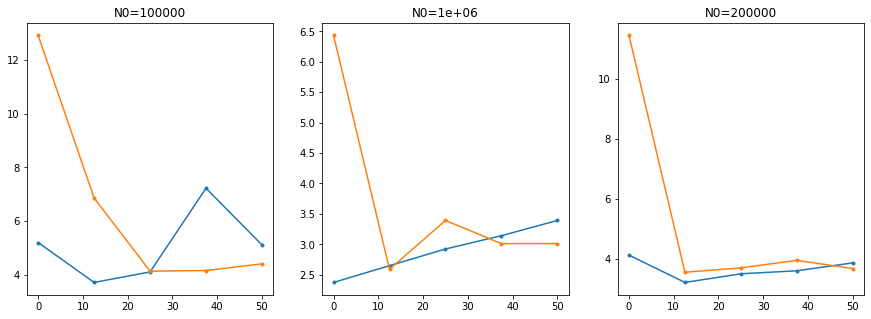

In [26]:
# plot parameters for supervised
plt.figure(figsize = [15,5])
for i, N0 in enumerate(sups):
    plt.subplot(1,3,i+1)
    plt.title('N0=%g'%N0)
    plt.plot(sups[N0][:,0], sups[N0][:,1], '.-')
    plt.plot(n2ns[N0][:,0], n2ns[N0][:,1], '.-')